You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Here’s the dataset link:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
df = pd.read_csv('diabetes.csv') 

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df["Glucose"].replace(0, df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(0, df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(0, df["SkinThickness"].mean(), inplace=True)
df["Insulin"].replace(0, df["Insulin"].mean(), inplace=True)
df["BMI"].replace(0, df["BMI"].mean(), inplace=True)

In [45]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

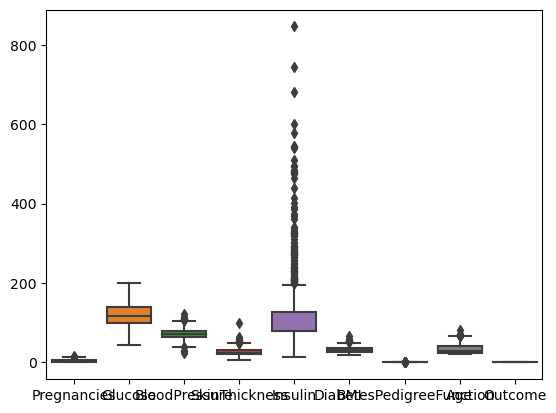

In [46]:
sns.boxplot(df)

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1


In [67]:
# Specify the column with outliers
feature_with_outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Calculate the IQR for the feature
Q1 = df[feature_with_outliers].quantile(0.25)
Q3 = df[feature_with_outliers].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter and remove outliers
df_filtered = df[(df[feature_with_outliers] >= lower_bound) & (df[feature_with_outliers] <= upper_bound)]



In [70]:
df.shape

(208, 9)

In [71]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to optimize
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy']
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_dt_classifier = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC-ROC
y_probs = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.7692307692307693
Precision: 0.875
Recall: 0.5833333333333334
F1 Score: 0.7000000000000001
Confusion Matrix:
[[26  2]
 [10 14]]


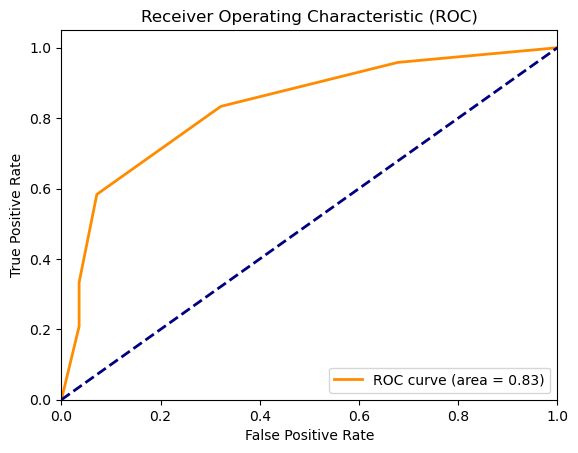

In [74]:
# Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [75]:
from sklearn.tree import export_text

# Export the decision tree as text
tree_rules = export_text(best_dt_classifier, feature_names=X.columns.tolist())
print(tree_rules)


|--- Glucose <= 165.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 31.40
|   |   |   |--- class: 0
|   |   |--- BMI >  31.40
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BloodPressure <= 77.00
|   |   |   |--- class: 0
|   |   |--- BloodPressure >  77.00
|   |   |   |--- class: 1
|--- Glucose >  165.50
|   |--- DiabetesPedigreeFunction <= 0.65
|   |   |--- class: 1
|   |--- DiabetesPedigreeFunction >  0.65
|   |   |--- Glucose <= 190.00
|   |   |   |--- class: 1
|   |   |--- Glucose >  190.00
|   |   |   |--- class: 0

